[Reference](https://medium.com/@Hong_Tang/4-tips-may-change-how-you-use-pandas-314406ea1570)

# Tip 1. Do Not use read_csv/to_csv, use read_parquet/to_parquet instead

In [1]:
# df.to_parquet('df.parquet.gzip', compression='gzip')  
# pd.read_parquet('df.parquet.gzip')

# Tip 2. How to remove unused categories from categorical variable

In [3]:
import seaborn as sns
import numpy as np
df=sns.load_dataset('tips')

In [4]:
df.loc[(df.day=='Fri'), 'day']=np.nan

In [5]:
df.day.cat.remove_unused_categories(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
df.day.value_counts() #before remove unused category
df.day.cat.remove_unused_categories(inplace=True)
df.day.value_counts() #after remove unused category

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Sat     87
Sun     76
Thur    62
Name: day, dtype: int64

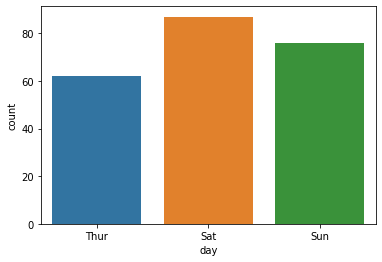

In [7]:
sns.countplot(x='day', data=df)

# Tip 3. How to run SQL query from notebook

In [8]:
# #step 1. connect with databased by providing credentials
# connection = pg.connect(user = user,
#                             password = password,
#                             host = host,
#                             port = port,
#                             database = database)

In [9]:
# # step 2. write SQL query
# query = f"""SELECT
#  col1, col2, col3
# FROM data_table1 t1
# JOIN data_table2 t2
# ON t1.time = t2.time 
# WHERE 
# t1.time >= ‘{START_DATE.strftime("%Y-%m-%d %H:%M:%S+00:00")}’
# AND t2.time < ‘{END_DATE.strftime("%Y-%m-%d %H:%M:%S+00:00")}’
# """

In [10]:
# # step 3, pull data from SQL and pass to a dataframe and close the connection to database
# df = psql.read_sql('''%s''' % (query), connection)
# connection.close()

# Tip 4. How to identify outliers in Pandas dataframe and plot them in one line code

In [11]:
# Friday_df=df.groupby('day').get_group('Fri')
# num_Fri=Friday_df[['total_bill','tip']]
# Q1 = num_Fri.quantile(0.25)
# Q3 = num_Fri.quantile(0.75)
# IQR = Q3 - Q1print(f'Q1 is {Q1}')
# print(f'Q3 is {Q3}')
# print(f'IQR is {IQR}')

In [12]:
# ((num_Fri < (Q1–1.5 * IQR)) | (num_Fri > (Q3 + 1.5 * IQR))).sum()